In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import r2_score, mean_absolute_error

In [2]:
df = pd.read_csv("güneş_enerji_verileri/gunesenerji_uretim.csv")
df = df[["date", "gunes"]]
df['date'] = pd.to_datetime(df['date'], utc=True)
df['date'] = df['date'].dt.tz_convert(None)
df.drop_duplicates(inplace=True)

train = df[(df["date"] >= "2022-01-01") & (df["date"] < "2025-01-01")].copy()
test = df[df["date"] >= "2025-01-01"].copy()

train.set_index("date", inplace=True)
test.set_index("date", inplace=True)

train = train.asfreq("H").fillna(method='ffill')
test = test.asfreq("H").fillna(method='ffill')

In [ ]:
result = adfuller(df["gunes"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
#Veri durağandır --> d=1

ADF Statistic: -7.058470716101341
p-value: 5.299126994527851e-10


In [8]:
final_model = SARIMAX(train,
                    order=(1,1,1),
                    seasonal_order=(1,1,0,24),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
final_result = final_model.fit()

forecast = final_result.predict(start=test.index[0], end=test.index[-1])

mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"MAE: {mae:.2f}, R²: {r2:.4f}")

MAE: 242.91, R²: 0.2081


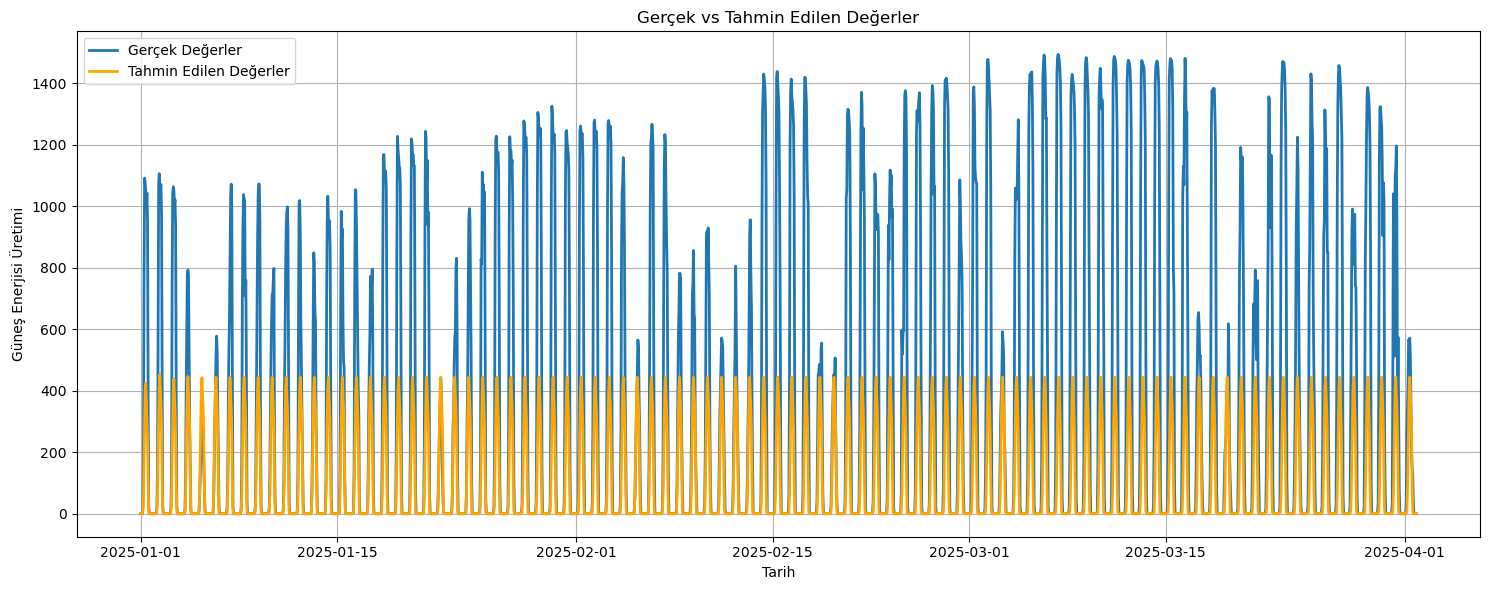

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(test.index, test.values, label='Gerçek Değerler', linewidth=2)
plt.plot(forecast.index, forecast.values, label='Tahmin Edilen Değerler', linewidth=2, color='orange')
plt.title('Gerçek vs Tahmin Edilen Değerler')
plt.xlabel('Tarih')
plt.ylabel('Güneş Enerjisi Üretimi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
